### Imports

In [1]:
import numpy as np
from math import sqrt
from sympy import init_printing, classify_ode, dsolve, solve, latex
from sympy import Function, Rational, dsolve, Eq, Derivative, symbols
from sympy.plotting import plot
from sympy.utilities.lambdify import lambdify
from IPython.display import display, display_latex, Markdown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
from warnings import filterwarnings
init_printing(use_latex='mathjax')
filterwarnings('ignore')
%matplotlib inline

### Symbols

In [2]:
t = symbols('t')

In [3]:
x = symbols('x')

In [4]:
y = symbols('y')

In [5]:
f = Function("f")

In [6]:
g = Function('g')

In [7]:
C1 = symbols('C1')

### Constants

In [99]:
FIGURE_SIZE = (5, 5)
DPI = 200
ARG_RANGE = (-10, 10)
NUM_STEPS = 10
FINE_STEPS = 1000 * NUM_STEPS
RANGE = np.linspace(*ARG_RANGE, NUM_STEPS)
FINE_RANGE = np.linspace(*ARG_RANGE, 1000 * NUM_STEPS)
POS_RANGE = np.linspace(0, ARG_RANGE[-1], FINE_STEPS)

### Utilities

In [73]:
def draw_the_slope_field(gradient, t_range, x_range):

    T, X = np.meshgrid(t_range, x_range)
    DT, DX = np.meshgrid(np.zeros(len(t_range)), np.zeros(len(x_range)))

    for t_idx, t_val in enumerate(t_range):
        for x_idx, x_val in enumerate(x_range):
            dt = 1
            try:
                dx = gradient(t_val, x_val)
                norm = sqrt(dt**2 + dx**2)
                dt /= norm
                dx /= norm
                DT[x_idx][t_idx] = dt
                DX[x_idx][t_idx] = dx
            except (ValueError, ZeroDivisionError):
                pass

    plt.quiver(T, X, DT, DX, angles='xy', color='#b5c7e5',
               edgecolors=('k',), units='x', width=0.1)


In [74]:
def draw_the_vector_field(x_gradient, y_gradient, x_range, y_range):
    X, Y = np.meshgrid(x_range, y_range)
    DX, DY = np.meshgrid(np.zeros(len(x_range)), np.zeros(len(y_range)))
    for x_idx, x_val in enumerate(x_range):
        for y_idx, y_val in enumerate(y_range):
            dx = x_gradient(x_val)
            dy = y_gradient(y_val)
            DX[y_idx][x_idx] = dx
            DY[y_idx][x_idx] = dy
    plt.quiver(X, Y, DX, DY, angles='xy', color='#b5c7e5',
               edgecolors=('k',), units='x', width=0.1)
 

In [75]:
def solve_ode(equation,
              initial_conditions=[],
              arg_range=ARG_RANGE,
              num_steps=NUM_STEPS,
              adjust_y=None,
              shouldPlot=True):
    display(Markdown("**The equation given:**"))
    display_latex(equation)
    display(Markdown("**General solutions:**"))

    solutions = dsolve(equation)
    try:
        iterator = iter(solutions)
    except TypeError:
        solutions = [solutions]
    display_latex(solutions)
    if initial_conditions:
        display(Markdown("**Initial conditions**"))
        display(initial_conditions)
        coefficients = []
        for solution_idx in range(len(solutions)):
            solution = solutions[solution_idx]
            display(Markdown(f"**The solution {solution_idx}**"))
            display_latex(solution)
            display(Markdown(
                "**has the following constants satisfying the initial conditions.**"))
            constants = []
            for initial_condition in initial_conditions:
                t_value, f_value = initial_condition
                suitable_constants = solve(
                    Eq(solution.rhs, f_value).subs(t, t_value), C1)
                constants += list(filter(lambda constant: np.isreal(constant)
                                         == True, suitable_constants))
                display(
                    Markdown(f"For f({t_value}) = {f_value}, {suitable_constants}"))
            coefficients.append(constants)

        functions = []
        for idx in range(len(solutions)):
            solution = solutions[idx]
            constants = coefficients[idx]
            for constant_idx in range(len(constants)):
                constant = constants[constant_idx]
                plot_idx = idx + constant_idx
                function = solution.rhs.subs(C1, constant)
                functions.append(function)

    if shouldPlot:
        display(Markdown("**The graph of solutions**"))

        RANGE = np.linspace(*arg_range, num=num_steps)
        FINE_RANGE = np.linspace(*arg_range, num=10000 * num_steps)

        plt.rc('text', usetex=True)
        fig = plt.figure(figsize=(8, 6), dpi=200)
        ax = fig.add_subplot(1, 1, 1)

        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')

        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')

        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        if initial_conditions:
            for function in functions:
                y_function = lambdify([t], function, "numpy")
                Y_RANGE = np.zeros(len(FINE_RANGE))
                for idx in range(len(FINE_RANGE)):
                    if adjust_y:
                        val = adjust_y(FINE_RANGE[idx], y_function)
                    else:
                        val = y_function(FINE_RANGE[idx])
                    if np.isreal(val):
                        Y_RANGE[idx] = val
                plt.plot(FINE_RANGE, Y_RANGE,
                         label=f"${latex(function)}$", linewidth=2)

            plt.legend(loc='lower left')

        df = lambdify([t, x], equation.rhs.subs(f(t), x), "numpy")
        draw_the_slope_field(df, RANGE, RANGE)
        plt.xlim(arg_range)
        plt.ylim(arg_range)
        plt.xlabel("t")
        plt.ylabel("x(t)")
        plt.gca().xaxis.set_label_coords(1.0, .5)
        plt.gca().yaxis.set_label_coords(.5, 1)
        plt.show()

# Problem 1

**The equation given:**

**General solutions:**

**Initial conditions**

[(0, -1), (0, 2)]

**The solution 0**

**has the following constants satisfying the initial conditions.**

For f(0) = -1, [9]

For f(0) = 2, []

**The solution 1**

**has the following constants satisfying the initial conditions.**

For f(0) = -1, []

For f(0) = 2, [36]

**The graph of solutions**

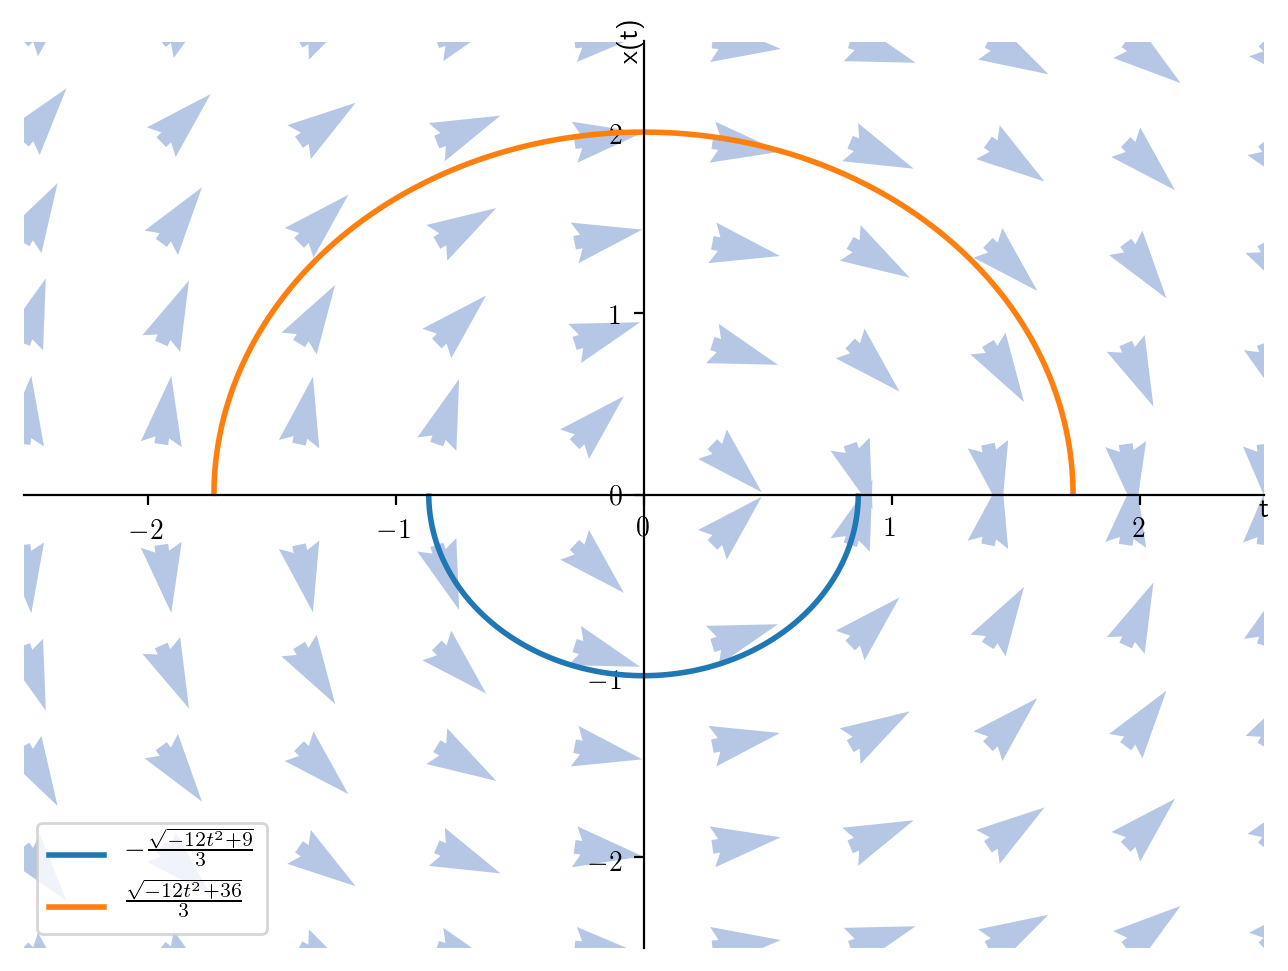

In [76]:
equation = Eq(f(t).diff(t), Rational(-4, 3)*t/f(t))
initial_conditions = [(0, -1), (0, 2)]
solve_ode(equation, initial_conditions, arg_range=[-2.5, 2.5])

The domain of the first solution is $(-\frac{\sqrt{3}}{2}, \frac{\sqrt{3}}{2})$. 

The domain of the second solution is $(-\sqrt{3}, \sqrt{3})$.

# Problem 2

**The equation given:**

**General solutions:**

**Initial conditions**

[(0, 2), (0, -1)]

**The solution 0**

**has the following constants satisfying the initial conditions.**

For f(0) = 2, []

For f(0) = -1, [9]

**The solution 1**

**has the following constants satisfying the initial conditions.**

For f(0) = 2, [36]

For f(0) = -1, []

**The graph of solutions**

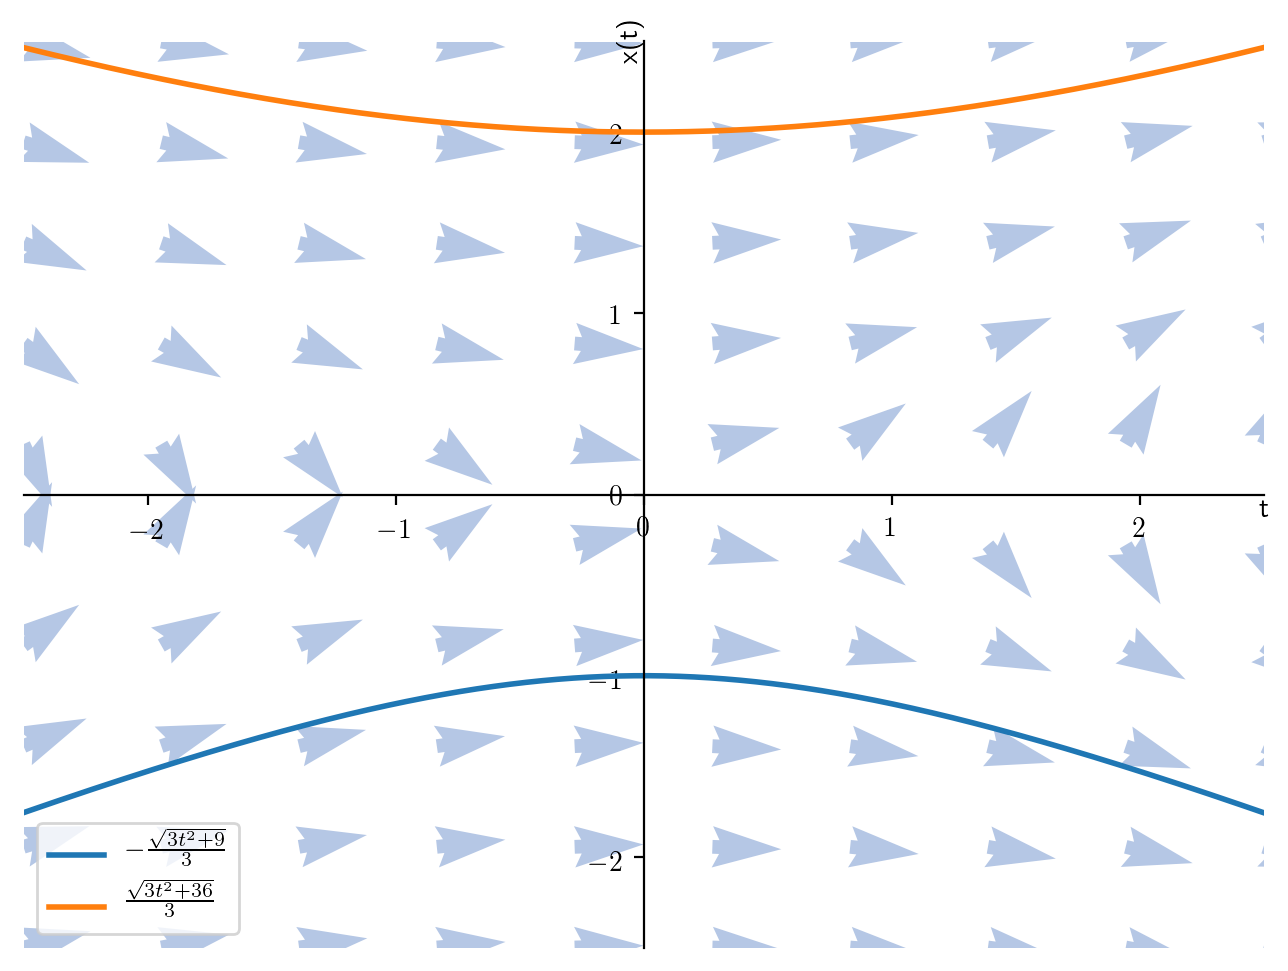

In [77]:
equation = Eq(f(t).diff(t), Rational(1, 3)*t/f(t))
initial_conditions = [(0, 2), (0, -1)]
solve_ode(equation, initial_conditions, arg_range=[-2.5, 2.5])

Both solutions have $\mathbb{R}$ as the domain.

# Problem 3

**The equation given:**

**General solutions:**

**Initial conditions**

[(1, 1), (1, -1), (-1, 1), (-1, -1), (1, 0), (-1, 0)]

**The solution 0**

**has the following constants satisfying the initial conditions.**

For f(1) = 1, [1]

For f(1) = -1, [-1]

For f(-1) = 1, [-(-1)**(4/5)]

For f(-1) = -1, [(-1)**(4/5)]

For f(1) = 0, [0]

For f(-1) = 0, [0]

**The graph of solutions**

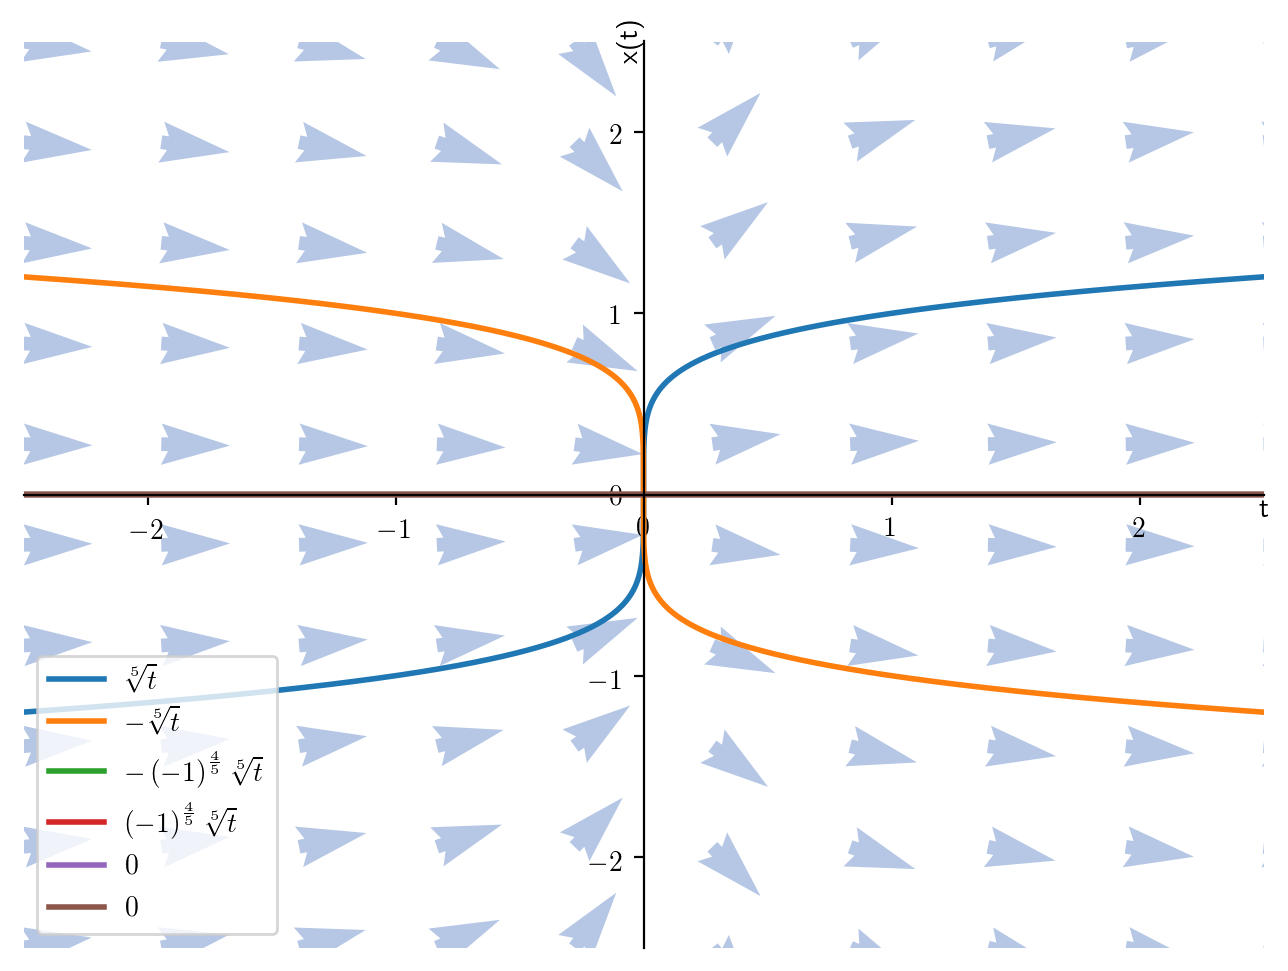

In [78]:
equation = Eq(f(t).diff(t), Rational(1, 5)*f(t)/t)
initial_conditions = [(1, 1), (1, -1), (-1, 1), (-1, -1), (1, 0), (-1, 0)]
# since numpy does not return the principal root in odd-root computations of negative numbers,
# we have to resort to a hack
solve_ode(equation, 
          initial_conditions,
          arg_range=[-2.5, 2.5],
          adjust_y = lambda y, func: np.sign(y) * func(np.abs(y)))

The domains of solutions are half-lines: $(-\infty, 0)$ for the branches on the left and $(0, \infty)$ for the branches on the right. The graphs are punctured at $t=0$ (not shown on the diagram).

# Problem 4

**The equation given:**

**General solutions:**

**Initial conditions**

[(1, 1), (1, -1), (-1, 1), (-1, -1), (1, 0), (-1, 0)]

**The solution 0**

**has the following constants satisfying the initial conditions.**

For f(1) = 1, [1]

For f(1) = -1, [-1]

For f(-1) = 1, [(-1)**(3/4)]

For f(-1) = -1, [-(-1)**(3/4)]

For f(1) = 0, [0]

For f(-1) = 0, [0]

**The graph of solutions**

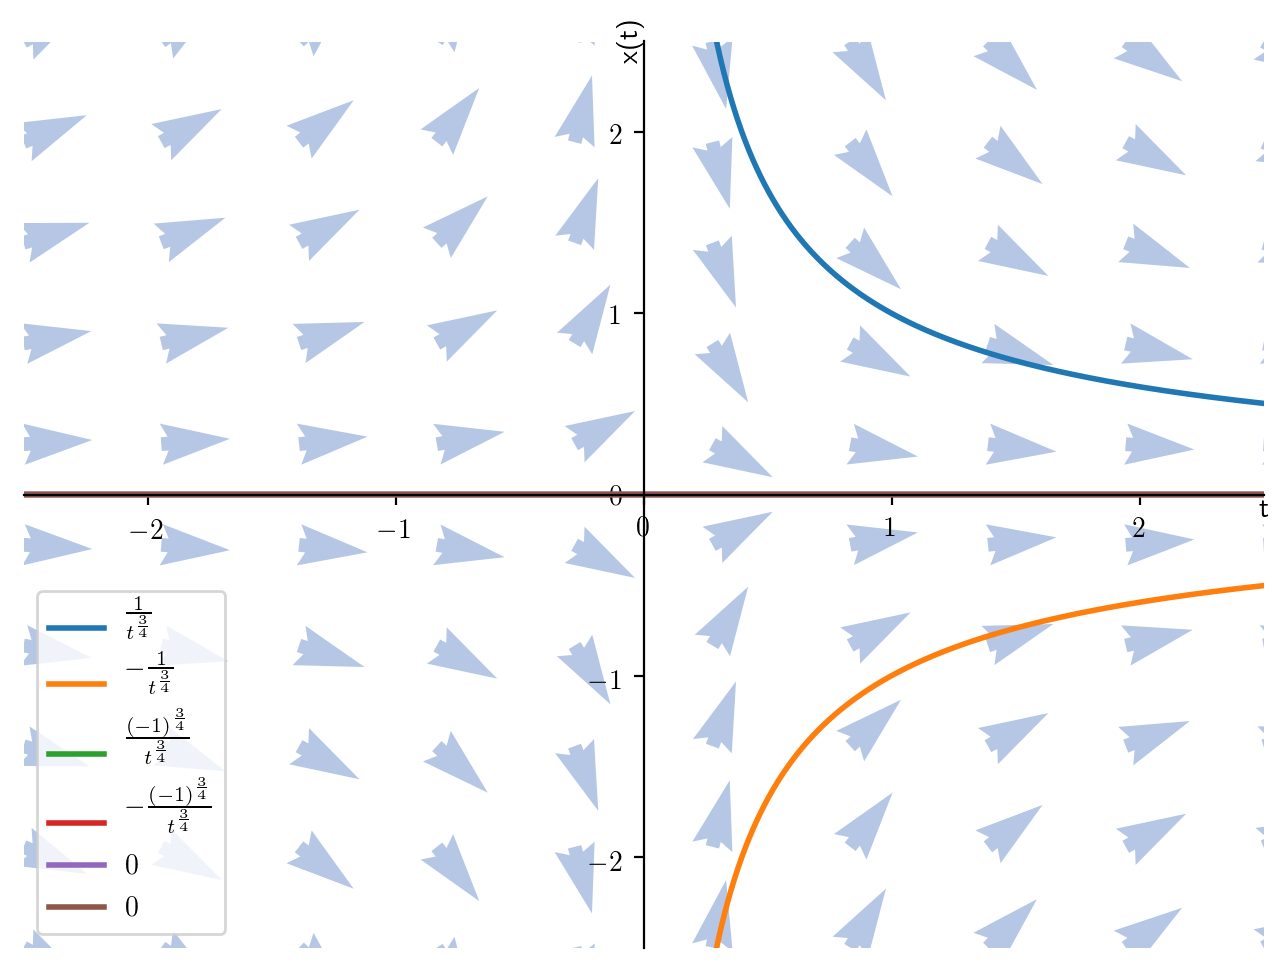

In [79]:
equation = Eq(f(t).diff(t), Rational(-3, 4)*f(t)/t)
initial_conditions = [(1, 1), (1, -1), (-1, 1), (-1, -1), (1, 0), (-1, 0)]
solve_ode(equation, initial_conditions, arg_range=[-2.5, 2.5])


The domain of all non-constant solutions is $\mathbb{R}^+$. The domain of constant solutions is either $(-\infty, 0)$ or $(0, \infty)$ (the diagram does not show that the point $t=0$ is punctured).

# Problem 5a

In [80]:
f_equation = Eq(f(t).diff(t), f(t))
solve_ode(f_equation, shouldPlot=False)

**The equation given:**

**General solutions:**

In [81]:
g_equation = Eq(g(t).diff(t), 5*g(t))
solve_ode(g_equation, shouldPlot=False)

**The equation given:**

**General solutions:**

Suppose that the constants are not zero. From the first equation we obtain that $e^t = \frac{f(t)}{C_f}$, so, subbing this result into the right hand side of the second equation, we get that $g(t) = \frac{C_g}{C_f^5}f^5(t)$. Thus, $y = Cx^5$ for some $C$ in our notation. These phase curves are undefined at zero, since $(x, y)$ only tends to $(0, 0)$ when $t\to\infty$. Note that they coincide with the integral curves from Problem 3 (up to rotation). 

Consider the case when $f(0) = 0$, $g(0) = 1$. Then $C_f = 0$, $C_g = 1$, and thus $x(y) = 0$ for any $y > 0$.

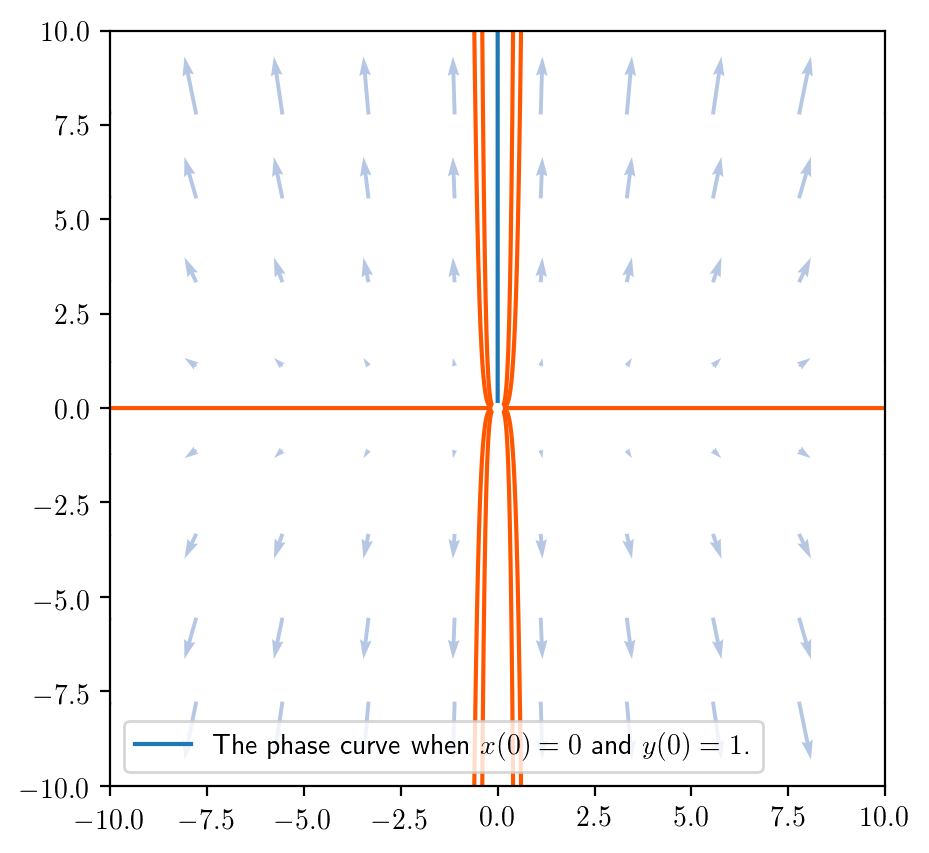

In [82]:
plt.figure(figsize=FIGURE_SIZE, dpi=DPI);

plt.xlim(*ARG_RANGE)
plt.ylim(*ARG_RANGE)

constants = np.linspace(*ARG_RANGE, 5) ** 3
for constant in constants:
    plt.plot(FINE_RANGE, constant * FINE_RANGE ** 5, color="#ff5700")
draw_the_vector_field(lambda x: x, lambda y: 5 * y, RANGE, RANGE)

plt.plot(np.zeros(len(POS_RANGE)), POS_RANGE, label='The phase curve when $x(0) = 0$ and $y(0)=1$.') 
plt.legend(loc='lower left')

circle=plt.Circle((0,0),0.1,color='white', zorder=15)
plt.gcf().gca().add_artist(circle)
plt.show();

# Problem 5b

In [83]:
f_equation = Eq(f(t).diff(t), -3 * f(t))
solve_ode(f_equation, shouldPlot=False)

**The equation given:**

**General solutions:**

In [84]:
g_equation = Eq(g(t).diff(t), 4 * g(t))
solve_ode(g_equation, shouldPlot=False)


**The equation given:**

**General solutions:**

Suppose that the constants are not zero. From the first equation we obtain that $e^{3t} = \frac{C_f}{f(t)}$ and thus $e^t = (\frac{C_f}{f(t)})^{\frac{1}{3}}$, so, subbing this result into the right hand side of the second equation, we get that $g(t) = \frac{C_g (C_f)^{\frac{4}{3}}}{f^{\frac{4}{3}}(t)}$. Thus, in our notation, $y = \frac{C}{x^{\frac{4}{3}}}$ for some $C$. These phase curves are undefined at zero, since $(x, y)$ only tends to $(0, 0)$ when $t\to\infty$. Note that they coincide with the integral curves from Problem 4 (up to rotation). 

Consider the case when $f(0) = 0$, $g(0) = 1$. Then $C_f = 0$, $C_g = 1$, and thus $x(y) = 0$ for $y > 0$.


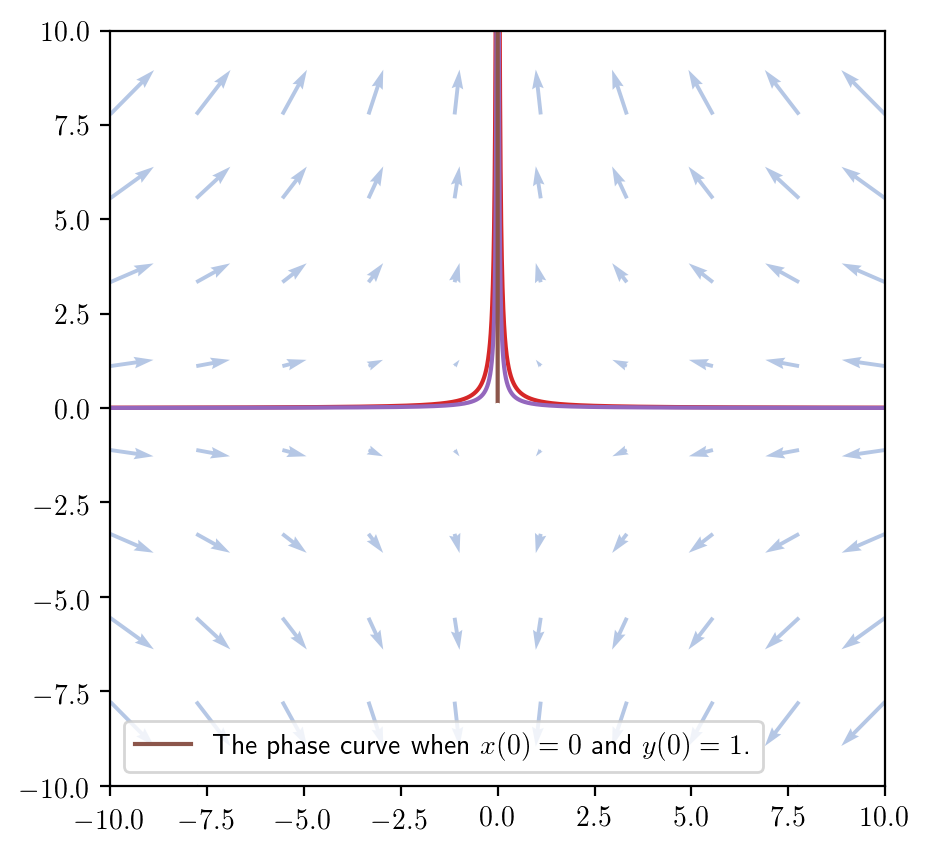

In [85]:
plt.figure(figsize=FIGURE_SIZE, dpi=DPI);
plt.xlim(*ARG_RANGE)
plt.ylim(*ARG_RANGE)


constants = np.linspace(*ARG_RANGE, 5) ** 3
for constant in constants:
    plt.plot(FINE_RANGE, 1 / ((constant * FINE_RANGE ** 4) ** (1/3)))
draw_the_vector_field(lambda x: -3 * x, lambda y: 4 * y, RANGE, RANGE)

plt.plot(np.zeros(len(POS_RANGE)), POS_RANGE, label='The phase curve when $x(0) = 0$ and $y(0)=1$.') 

circle=plt.Circle((0,0),0.1,color='white', zorder=15)
plt.gcf().gca().add_artist(circle)

plt.legend(loc='lower left')
plt.show();

# Problem 6

Consider the substitution $z = 6t + 3x + 4$. Then $\frac{dz}{dx}= 3$, and thus $\frac{dz}{dt} = 3\frac{dx}{dt} = 3(z^2 - 3) = 3z^2 - 9$. 

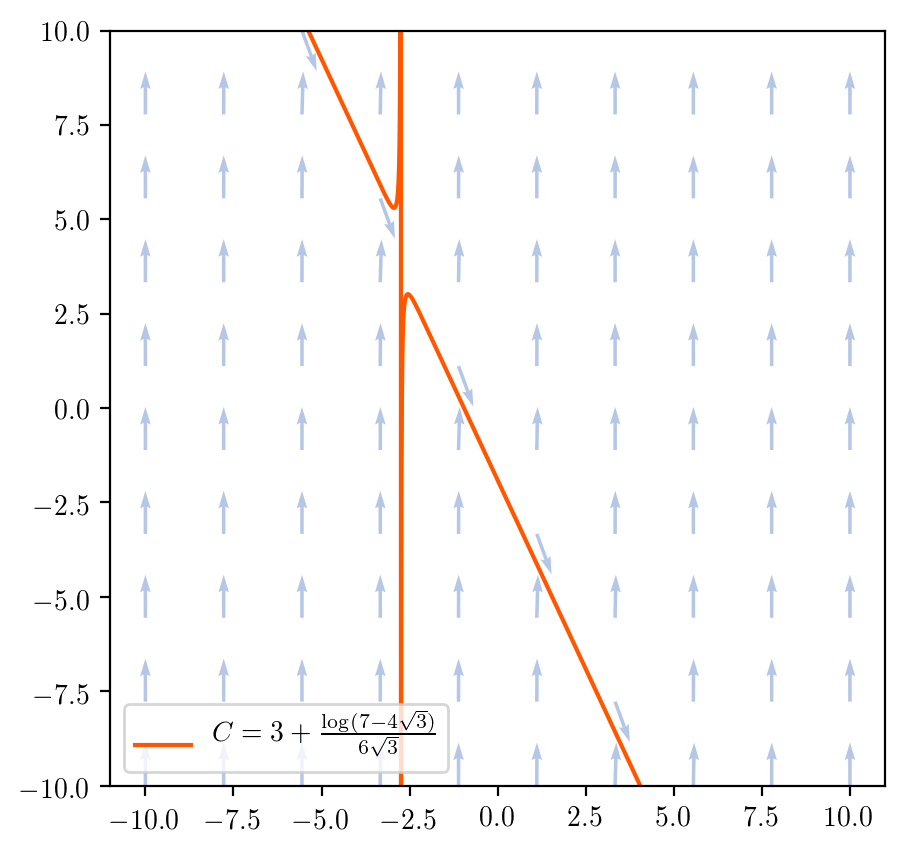

In [132]:
plt.figure(figsize=FIGURE_SIZE, dpi=DPI)
plt.ylim(-10, 10)
gradient = lambda t, x: (-6 * t - 3 * x - 4) ** 2 - 3
draw_the_slope_field(gradient, RANGE, RANGE)
function = lambda t, C: - (6 * t + 4) / 3 + 1/3 * (np.sqrt(3) * (1 +  np.exp((6 * np.sqrt(3) * (t + C)))))/(1 - np.exp(6 * np.sqrt(3) * (t + C)))
C = 3 + np.log(7-4*np.sqrt(3)) / (6 * np.sqrt(3))
plt.plot(FINE_RANGE, function(FINE_RANGE, C), label="$C = 3 + \\frac{\\log(7-4\\sqrt{3})}{6\\sqrt{3}}$", color="#ff5700")
plt.legend(loc='lower left')
plt.show();

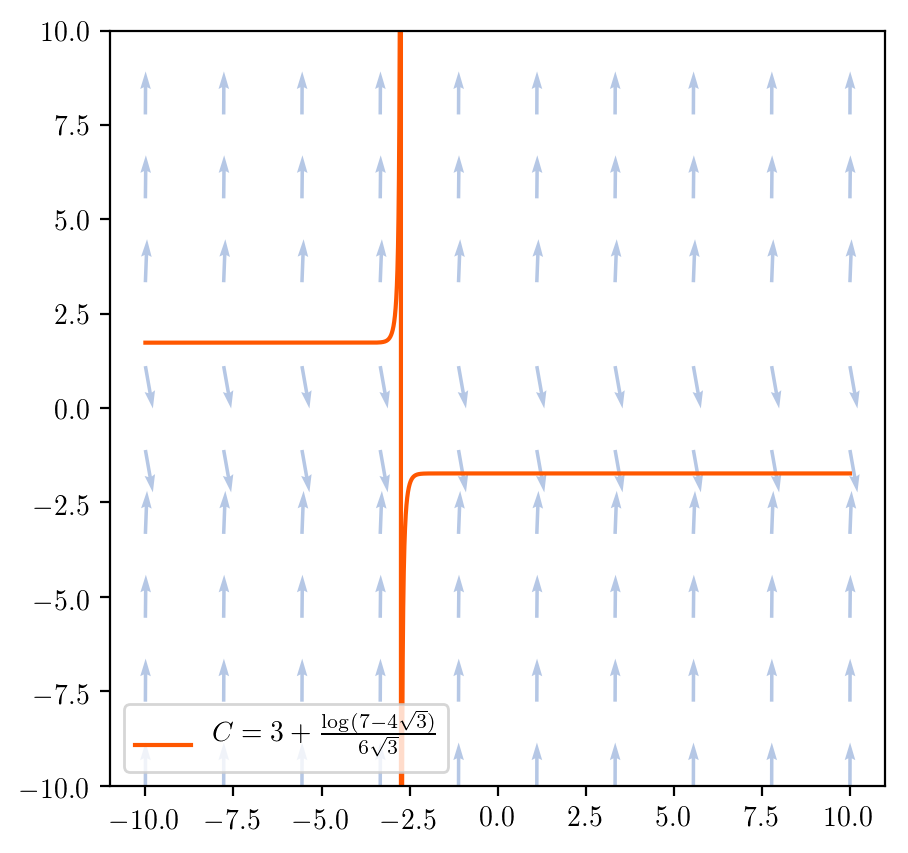

In [135]:
plt.figure(figsize=FIGURE_SIZE, dpi=DPI)
plt.ylim(-10, 10)
gradient = lambda t, z: 3 * z ** 2 - 9
draw_the_slope_field(gradient, RANGE, RANGE)
function = lambda t, C: (np.sqrt(3) * (1 +  np.exp((6 * np.sqrt(3) * (t + C)))))/(1 - np.exp(6 * np.sqrt(3) * (t + C)))
C = 3 + np.log(7-4*np.sqrt(3)) / (6 * np.sqrt(3))
plt.plot(FINE_RANGE, function(FINE_RANGE, C), label="$C = 3 + \\frac{\\log(7-4\\sqrt{3})}{6\\sqrt{3}}$", color="#ff5700")
plt.legend(loc='lower left')
plt.show();


Let's solve $\dot{z} = 3z^2 - 9$.

Note the following:

$$
\frac{dz}{3z^2 - 9} = dt\\
\int \frac{dz}{3z^2 - 9} = \int dt \\
\frac{\sqrt{3}}{18} (\log |\sqrt 3 - z| - \log |\sqrt 3 + z|) = t + C, C \in \mathbb{R} \\ 
\log\frac{|\sqrt 3 - z|}{|\sqrt 3 + z|} = 6\sqrt{3} (t + C) \\ 
\frac{|\sqrt 3 - z|}{|\sqrt 3 + z|} = \exp{(6\sqrt{3} (t + C))}
$$

If $z \in (-\sqrt 3, \sqrt 3)$, then 
$$
\sqrt 3 - z = \exp{(6\sqrt{3} (t + C))} (\sqrt 3 + z)\\
(1 + \exp{(6\sqrt{3} (t + C))})z = (1 - \exp{(6\sqrt{3} (t + C))})\sqrt 3\\
z = \frac{(1 - \exp{(6\sqrt{3} (t + C))})\sqrt 3}{1 + \exp{(6\sqrt{3} (t + C))}}.
$$

Thus, $$
6t + 3x + 4 = \frac{(1 - \exp{(6\sqrt{3} (t + C))})\sqrt 3}{1 + \exp{(6\sqrt{3} (t + C))}} \\
x = - \frac{(6t + 4)}{3} + \frac{1}{3}\frac{(1 - \exp{(6\sqrt{3} (t + C))})\sqrt 3}{1 + \exp{(6\sqrt{3} (t + C))}}
$$

If $z \in (-\infty, -\sqrt 3)$ or $z \in (\sqrt 3, \infty)$, then $$
z - \sqrt 3 = \exp{(6\sqrt{3} (t + C))}(\sqrt 3 + z)\\
z = \frac{\sqrt 3 (1 +  \exp{(6\sqrt{3} (t + C))})}{1 - \exp{(6\sqrt{3} (t + C))}},
$$
so 
$$
x = - \frac{(6t + 4)}{3} + \frac{1}{3}(\frac{\sqrt 3 (1 +  \exp{(6\sqrt{3} (t + C))})}{1 - \exp{(6\sqrt{3} (t + C))}})
$$.

Note that $z=\sqrt 3$ or $z=-\sqrt 3$ are also solutions, since $\dot{z} = 0 = 3z^2 - 9$. 

If $x(-3) = 4$ , then $z=2$, and thus $C$ is such that $$
2 = \frac{\sqrt 3 (1 +  \exp{(6\sqrt{3} (-3 + C))})}{1 - \exp{(6\sqrt{3} (-3 + C))}}\\
2(1 - \exp{(6\sqrt{3} (-3 + C))}) = \sqrt 3 (1 +  \exp{(6\sqrt{3} (-3 + C))})\\
2 - \sqrt 3 = (2 + \sqrt 3)\exp{(6\sqrt{3} (-3 + C))}\\
7 - 4\sqrt 3 = \exp{(6\sqrt{3} (-3 + C))}\\
C = 3 + \frac{\log(7-4\sqrt 3)}{6\sqrt 3}
$$

# Problem 7

Consider the following function approximating a solution to the given first-order initial value problem:

In [136]:
def approximate_by_euler_method(gradient, arg_range, x_start, partition_size, should_print = True):
    t_start, t_finish = arg_range
    delta_t = (t_finish - t_start) / (partition_size - 1)
    T = np.linspace(t_start, t_finish, partition_size)
    X = np.zeros(partition_size)
    X[0] = x_start
    for idx in range(1, partition_size):
        X[idx] = delta_t * gradient(T[idx - 1], X[idx - 1]) + X[idx - 1]
    if should_print:
        plt.plot(T, X, label=f"Partition size: {partition_size}")
    return T, X

First, let's solve the ODE $\dot{x} = 2x^2 + 2$ analytically.

Note the following:

$$
\frac{dx}{2x^2 + 2} = dt \\
\int \frac{dx}{2x^2 + 2} = \int dt \\
\frac{1}{2}\arctan(x) = t + \frac{C}{2}, C \in \mathbb{R}\\
x = \tan(2t + C)
$$

If $x(0) = 1$, then $C = \frac{\pi}{4}$.

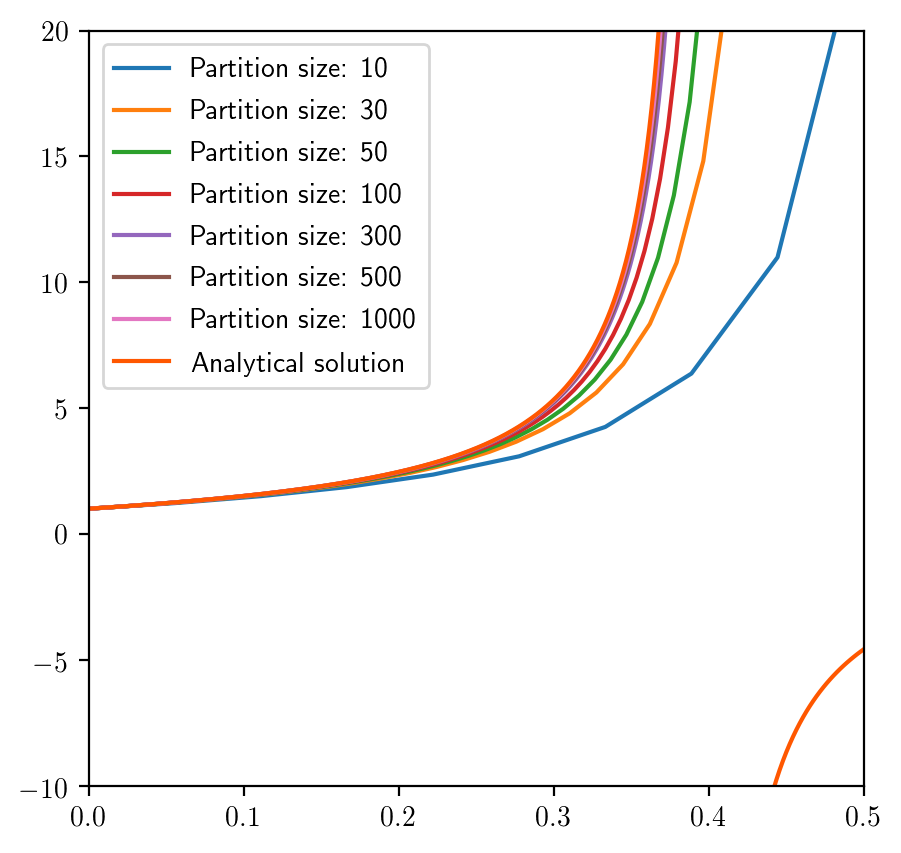

In [137]:
gradient = lambda t, x: 2*x*x + 2
function = lambda x: np.tan(2 * x + np.pi / 4)
ARG_RANGE = [0, 0.5]
plt.figure(figsize=FIGURE_SIZE, dpi=DPI)
plt.xlim(*ARG_RANGE)
plt.ylim(-10, 20)
partition_sizes = [10, 30, 50, 100, 300, 500, 1000]
for partition_size in partition_sizes:
    approximate_by_euler_method(gradient, 
                                arg_range = ARG_RANGE,
                                x_start = 1,
                                partition_size = partition_size)
    

# to account for the vertical asymptote at x=np.pi/2, we divide the domain in two
T1 = np.linspace(0, np.pi/8, 1000)
T2 = np.linspace(np.pi/8 + 1./1000, 0.5)
plt.plot(T1, function(T1), label = "Analytical solution", color="#ff5700")
plt.plot(T2, function(T2), color="#ff5700")
plt.legend(loc='upper left')   
plt.show();

In [59]:
def count_steps(t_val, epsilon=1./100):
    x_val = function(t_val)
    display(Markdown(f"The exact x-value to 2 decimal places: {round(x_val, 2)}"))
    current_val = 0
    partition_size = 2
    while abs(current_val - x_val) >= epsilon:
        partition_size += 1
        T, X = approximate_by_euler_method(gradient,
                                           arg_range=[0, t_val],
                                           x_start = 1,
                                           partition_size=partition_size, 
                                           should_print = False)
        current_val = X[-1]
        if (partition_size % 5000 == 0):
            display(Markdown(f"The partition size is greater than {partition_size - 1}..."))
    display(Markdown(f"The partition size required to reach the precision of {epsilon} is {partition_size}"))

In [60]:
count_steps(0.3)

The exact x-value to 2 decimal places: 5.33

The partition size required to reach the precision of 0.01 is 2367

In [61]:
count_steps(0.35)

The exact x-value to 2 decimal places: 11.68

The partition size is greater than 4999...

The partition size is greater than 9999...

The partition size is greater than 14999...

The partition size is greater than 19999...

The partition size required to reach the precision of 0.01 is 20325

Since $t=0.4 > \frac{\pi}{8}$, the Euler method fails to approximate the solution, since the domain contains a singularity point.